In [416]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import inf
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

#for kmeans
import sklearn as sk
%matplotlib inline
from sklearn.cluster import KMeans

In [417]:
iris = load_iris()
iris.data
d = iris.data[:,0:2]
df = pd.DataFrame(data=d, columns=[['X','Y']])
df

,X,Y
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


# Scaling the data

In [418]:
scaler = StandardScaler()
df[['X','Y']] = scaler.fit_transform(df[['X','Y']])
df

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


,X,Y
0,-0.900681,1.019004
1,-1.143017,-0.131979
2,-1.385353,0.328414
3,-1.506521,0.098217
4,-1.021849,1.249201
...,...,...
145,1.038005,-0.131979
146,0.553333,-1.282963
147,0.795669,-0.131979
148,0.432165,0.788808


Text(0, 0.5, 'Y')

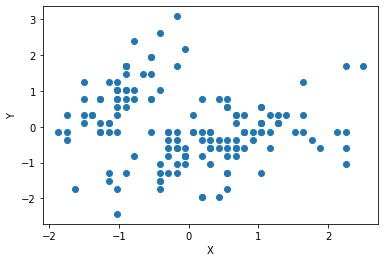

In [419]:
plt.scatter(df['X'], df['Y'])
plt.xlabel('X')
plt.ylabel('Y')

# The distance between all the points

In [420]:
distances = df.T.apply(lambda x: np.sqrt(((df - x) ** 2).sum(axis=1)))
for i in range(len(distances)):
    for j in range(len(distances)):
        if(i >= j):
            distances.iat[i,j] = inf
distances

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,inf,1.176219,0.843695,1.102221,0.260139,0.989941,0.648099,0.260139,1.620821,0.952143,...,2.146241,2.367426,2.027510,2.172536,1.992603,2.254610,2.722722,2.049968,1.352579,1.504789
1,inf,inf,0.520278,0.430262,1.386485,2.158536,0.989941,0.928725,0.648099,0.230197,...,2.193136,2.434266,1.290786,2.347773,2.287744,2.181022,2.049968,1.938686,1.824568,1.211679
2,inf,inf,inf,0.260139,0.989941,1.820972,0.476071,0.586598,0.780416,0.334241,...,2.434266,2.675614,1.761035,2.544525,2.434266,2.466703,2.520920,2.229085,1.874922,1.525162
3,inf,inf,inf,inf,1.248868,2.081111,0.690590,0.843695,0.520278,0.363504,...,2.544525,2.786861,1.721048,2.675614,2.585841,2.554917,2.480052,2.313670,2.058013,1.591914
4,inf,inf,inf,inf,inf,0.843695,0.668482,0.460394,1.767789,1.157344,...,2.359610,2.573877,2.287326,2.367426,2.172536,2.480052,2.982123,2.282768,1.525162,1.759794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,1.248868,0.242336,1.102221,0.969343
146,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,1.176219,2.075311,1.248868
147,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,0.989941,0.727007
148,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,0.989941


# Calculate the mean of all distances

In [421]:
m = 0
k = 0
for i in range(len(distances)):
    for j in range(len(distances)):
        if(distances.iat[i,j] != inf):
           k = k+1
           m = m + distances.iat[i,j] 
m = m / k

m



1.7795463672293457

# Retrieve the index of min value

In [422]:
minval = min(distances.min())

print(minval)
for i in range(len(distances)):
    for j in range(len(distances)):
        if(distances.iloc[i,j]==minval):
          minindice = [i, j]
    break

print(minindice)


0.0
[0, 17]


# Initialize points list

In [423]:
points = []
for i in range(df.shape[0]):
      point = df.iloc[i,0:]
      point = np.array(point)
      points.append(point)

points

[array([-0.90068117,  1.01900435]),
 array([-1.14301691, -0.13197948]),
 array([-1.38535265,  0.32841405]),
 array([-1.50652052,  0.09821729]),
 array([-1.02184904,  1.24920112]),
 array([-0.53717756,  1.93979142]),
 array([-1.50652052,  0.78880759]),
 array([-1.02184904,  0.78880759]),
 array([-1.74885626, -0.36217625]),
 array([-1.14301691,  0.09821729]),
 array([-0.53717756,  1.47939788]),
 array([-1.26418478,  0.78880759]),
 array([-1.26418478, -0.13197948]),
 array([-1.87002413, -0.13197948]),
 array([-0.05250608,  2.16998818]),
 array([-0.17367395,  3.09077525]),
 array([-0.53717756,  1.93979142]),
 array([-0.90068117,  1.01900435]),
 array([-0.17367395,  1.70959465]),
 array([-0.90068117,  1.70959465]),
 array([-0.53717756,  0.78880759]),
 array([-0.90068117,  1.47939788]),
 array([-1.50652052,  1.24920112]),
 array([-0.90068117,  0.55861082]),
 array([-1.26418478,  0.78880759]),
 array([-1.02184904, -0.13197948]),
 array([-1.02184904,  0.78880759]),
 array([-0.7795133 ,  1.0190

# Create the first cluster from the 2 points with the min distance

In [424]:
clusters = []
clusters.append(np.concatenate((points[minindice[0]], points[minindice[1]])))
print(clusters)
print(points)
points.pop(minindice[0])
points.pop(minindice[1]-1)

points


[array([-0.90068117,  1.01900435, -0.90068117,  1.01900435])]
[array([-0.90068117,  1.01900435]), array([-1.14301691, -0.13197948]), array([-1.38535265,  0.32841405]), array([-1.50652052,  0.09821729]), array([-1.02184904,  1.24920112]), array([-0.53717756,  1.93979142]), array([-1.50652052,  0.78880759]), array([-1.02184904,  0.78880759]), array([-1.74885626, -0.36217625]), array([-1.14301691,  0.09821729]), array([-0.53717756,  1.47939788]), array([-1.26418478,  0.78880759]), array([-1.26418478, -0.13197948]), array([-1.87002413, -0.13197948]), array([-0.05250608,  2.16998818]), array([-0.17367395,  3.09077525]), array([-0.53717756,  1.93979142]), array([-0.90068117,  1.01900435]), array([-0.17367395,  1.70959465]), array([-0.90068117,  1.70959465]), array([-0.53717756,  0.78880759]), array([-0.90068117,  1.47939788]), array([-1.50652052,  1.24920112]), array([-0.90068117,  0.55861082]), array([-1.26418478,  0.78880759]), array([-1.02184904, -0.13197948]), array([-1.02184904,  0.7888

[array([-1.14301691, -0.13197948]),
 array([-1.38535265,  0.32841405]),
 array([-1.50652052,  0.09821729]),
 array([-1.02184904,  1.24920112]),
 array([-0.53717756,  1.93979142]),
 array([-1.50652052,  0.78880759]),
 array([-1.02184904,  0.78880759]),
 array([-1.74885626, -0.36217625]),
 array([-1.14301691,  0.09821729]),
 array([-0.53717756,  1.47939788]),
 array([-1.26418478,  0.78880759]),
 array([-1.26418478, -0.13197948]),
 array([-1.87002413, -0.13197948]),
 array([-0.05250608,  2.16998818]),
 array([-0.17367395,  3.09077525]),
 array([-0.53717756,  1.93979142]),
 array([-0.17367395,  1.70959465]),
 array([-0.90068117,  1.70959465]),
 array([-0.53717756,  0.78880759]),
 array([-0.90068117,  1.47939788]),
 array([-1.50652052,  1.24920112]),
 array([-0.90068117,  0.55861082]),
 array([-1.26418478,  0.78880759]),
 array([-1.02184904, -0.13197948]),
 array([-1.02184904,  0.78880759]),
 array([-0.7795133 ,  1.01900435]),
 array([-0.7795133 ,  0.78880759]),
 array([-1.38535265,  0.3284

# Function to calculate the center of a cluster

In [425]:
def cluster_center(cluster):
  center = []
  nbrCordonnee = df.shape[1]
  i = 0
  while(i<nbrCordonnee):
    j = i
    c = cluster[i]
    while(j<len(cluster)-nbrCordonnee):
      c = c + cluster[j+nbrCordonnee]
      j = j+ nbrCordonnee
    c = c / (len(cluster)/nbrCordonnee)
    center.append(c)
    i = i + 1

  return center
cluster_center(clusters[0])


[-0.9006811702978088, 1.019004351971607]

## The center of the first cluster

In [426]:
print(clusters[0])
center = cluster_center(clusters[0])
center

[-0.90068117  1.01900435 -0.90068117  1.01900435]


[-0.9006811702978088, 1.019004351971607]

# Calculate the distance between c1 and the the farthest point from c1


In [427]:
d = 0
dmax = 0
for i in range (len(points)):
  d = 0
  for j in range (df.shape[1]):
    d = d + ((center[j]-points[i][j])**2)
  d = np.sqrt(d)
  if(d > dmax):
    dmax = d
    c2indix = i 
print(points[c2indix],dmax)

[ 2.24968346 -1.05276654] 3.77054796528266


# Make the new point as a new cluster


In [428]:
clusters.append(points[c2indix])
print(clusters)
points.pop(c2indix)

print(points)


[array([-0.90068117,  1.01900435, -0.90068117,  1.01900435]), array([ 2.24968346, -1.05276654])]
[array([-1.14301691, -0.13197948]), array([-1.38535265,  0.32841405]), array([-1.50652052,  0.09821729]), array([-1.02184904,  1.24920112]), array([-0.53717756,  1.93979142]), array([-1.50652052,  0.78880759]), array([-1.02184904,  0.78880759]), array([-1.74885626, -0.36217625]), array([-1.14301691,  0.09821729]), array([-0.53717756,  1.47939788]), array([-1.26418478,  0.78880759]), array([-1.26418478, -0.13197948]), array([-1.87002413, -0.13197948]), array([-0.05250608,  2.16998818]), array([-0.17367395,  3.09077525]), array([-0.53717756,  1.93979142]), array([-0.17367395,  1.70959465]), array([-0.90068117,  1.70959465]), array([-0.53717756,  0.78880759]), array([-0.90068117,  1.47939788]), array([-1.50652052,  1.24920112]), array([-0.90068117,  0.55861082]), array([-1.26418478,  0.78880759]), array([-1.02184904, -0.13197948]), array([-1.02184904,  0.78880759]), array([-0.7795133 ,  1.0190

# Apply my method

## Function to calculate the center of each cluster

In [429]:
def centerOfEachCLuster(clusters):
  clusters_centers = []
  for i in range(len(clusters)):
    clusters_centers.append(cluster_center(clusters[i]))
  return clusters_centers
  
clusters_centers = centerOfEachCLuster(clusters)
clusters_centers

[[-0.9006811702978088, 1.019004351971607],
 [2.2496834612371255, -1.0527665443562098]]

## Function to calculate the center point of all clusters

In [430]:
def centerPoint(clusters_centers):
  cc = []
  for j in range(df.shape[1]):
    c = 0
    for i in range(len(clusters_centers)):
      c = c + clusters_centers[i][j]
    c = c / len(clusters_centers)
    cc.append(c)
  return cc

centerPoint(clusters_centers)


[0.6745011454696583, -0.01688109619230138]

### add a point to a cluster (doesn't work i added it to the code directly)

In [431]:
def AddDataCLuster(cluster, point):
 cluster =  np.concatenate((cluster, point))




### Create new cluster

In [432]:
def newCluster(clusters,point):
  clusters.append(point)


# Assign each element to its cluster

In [433]:
#assign the rest of data to their clusters
while(len(points)!= 0):
  #calculate the min dist between a point from the dataset and the center of each cluster
  p1  = points[0]
  distmin = inf
  dist = 0
  clusters_centers = centerOfEachCLuster(clusters)
  for i in range(len(clusters_centers)):
    dist = np.linalg.norm(p1 - clusters_centers[i])
    if(dist < distmin):
      distmin = dist 
      distminindex = i #the closest cluster to the current point
  #the center point of all clusters
  centerPoint(clusters_centers)
  #calculate the distance between the center of the closest cluster and the center of all the clusters
  distCenterClosetCluster = np.linalg.norm(np.array(cluster_center(clusters[distminindex])) - np.array(centerPoint(clusters_centers)))
  #calculate the distance between the current point from the dataset and the  center of all clusters
  distCenterPoint = np.linalg.norm(p1 - centerPoint(clusters_centers))
  #calculate the distance between the point and the the center the closest clusters
  distPointClosetCluster = np.linalg.norm(np.array(p1) - np.array(cluster_center(clusters[distminindex])))

  if(distPointClosetCluster > m):
    x1 = m / distPointClosetCluster
  else:
    x1 = distPointClosetCluster / m

  if(x1 >= 0.036):
    #add data to the existing cluster
    clusters[distminindex] =  np.concatenate((clusters[distminindex], p1))
  else: #create new cluster using the curent data
    newCluster(clusters, p1)
  points.pop(0)

print('The total number of clusters: ',len(clusters))
for i in range(len(clusters)):
  print('The ',i,' cluster contains ',len(clusters[i])/2,' element')
print(clusters[i])

  








The total number of clusters:  3
The  0  cluster contains  51.0  element
The  1  cluster contains  84.0  element
The  2  cluster contains  15.0  element
[ 0.4321654  -0.59237301  0.67450115 -0.59237301  1.64384411 -0.13197948
  1.88617985 -0.59237301  2.4920192   1.70959465  2.24968346 -0.13197948
  0.55333328  0.78880759  1.2803405   0.09821729  1.03800476  0.09821729
  1.2803405   0.09821729  1.15917263  0.32841405  1.03800476  0.55861082
  1.03800476 -0.13197948  0.79566902 -0.13197948  0.4321654   0.78880759]


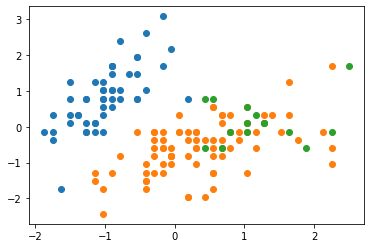

In [434]:
clusterlist = []
for i in range(len(clusters)):
  c1 = []
  c2 = []
  j = 0
  while (j < len(clusters[i]-1)):
    c1.append(clusters[i][j])
    c2.append(clusters[i][j+1])
    j += 2
  clusterlist.append(c1)
  clusterlist.append(c2)
  plt.scatter(c1, c2)

  

# Comparing our clustering algorithm results with kmeans results


## Number of elements for each cluster

In [435]:
nbrElem = []
for i in range(len(clusters)):
  print('The ',i,' cluster contains ',len(clusters[i])/2,' element')
  nbrElem.append(len(clusters[i])/2)
print(nbrElem)

The  0  cluster contains  51.0  element
The  1  cluster contains  84.0  element
The  2  cluster contains  15.0  element
[51.0, 84.0, 15.0]


## Interdistance

In [436]:
#le centre de chaque cluster
clusters_centers = centerOfEachCLuster(clusters)
print(clusters_centers)
#la distance entre les clusters
distanceEntreCluster = []
for i in range(len(clusters_centers)-1):
  j = i + 1
  while(j<len(clusters_centers)):
      d = 0
      d = ((clusters_centers[i][0]-clusters_centers[j][0])**2)+((clusters_centers[i][1]-clusters_centers[j][1])**2)
      d = np.sqrt(d)
      print("la distance entre le cluster",i,"et le cluster",j,"est",d)
      distanceEntreCluster.append(d) 
      j = j + 1

distanceEntreCluster

[[-0.9909631129813131, 0.8519988548820007], [0.38744869049005587, -0.5430451333549217], [1.1995619173921475, 0.1442566401887508]]
la distance entre le cluster 0 et le cluster 1 est 1.9611646613849563
la distance entre le cluster 0 et le cluster 2 est 2.30202062352872
la distance entre le cluster 1 et le cluster 2 est 1.0639133523109885


[1.9611646613849563, 2.30202062352872, 1.0639133523109885]

In [437]:
df

,X,Y
0,-0.900681,1.019004
1,-1.143017,-0.131979
2,-1.385353,0.328414
3,-1.506521,0.098217
4,-1.021849,1.249201
...,...,...
145,1.038005,-0.131979
146,0.553333,-1.282963
147,0.795669,-0.131979
148,0.432165,0.788808




---



---


#**kmeans**


## Import iris dataset

In [438]:
iris = load_iris()
d = iris.data[:,0:2]
dfkmeans = pd.DataFrame(data=d, columns=[['sepal length', 'sepal width']])

#---scalling
scaler = StandardScaler()
dfkmeans[['sepal length', 'sepal width']] = scaler.fit_transform(dfkmeans[['sepal length', 'sepal width']])
dfkmeans

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


,sepal length,sepal width
0,-0.900681,1.019004
1,-1.143017,-0.131979
2,-1.385353,0.328414
3,-1.506521,0.098217
4,-1.021849,1.249201
...,...,...
145,1.038005,-0.131979
146,0.553333,-1.282963
147,0.795669,-0.131979
148,0.432165,0.788808


# VIsualisation des clusters à partir le regroupement du dataset

Text(0, 0.5, 'sepal length')

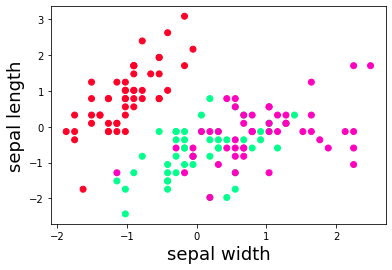

In [439]:
plt.scatter(x=dfkmeans['sepal length'],y = dfkmeans['sepal width'], c = iris.target, cmap='gist_rainbow')
plt.xlabel('sepal width', fontsize=18)
plt.ylabel('sepal length', fontsize=18)

# Results using  KMeans  k=3

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


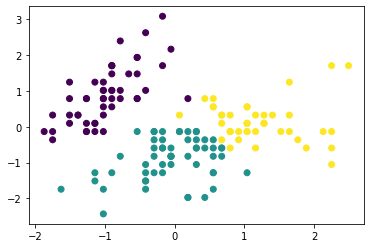

In [440]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(dfkmeans[['sepal length','sepal width']])
dfkmeans['kmeans_3'] = kmeans.labels_
dfkmeans
plt.scatter(x=dfkmeans['sepal length'],y = dfkmeans['sepal width'], c = dfkmeans['kmeans_3'])
plt.show()

## Number of elements for each cluster

In [441]:
dfkmeans

,sepal length,sepal width,kmeans_3
0,-0.900681,1.019004,0
1,-1.143017,-0.131979,0
2,-1.385353,0.328414,0
3,-1.506521,0.098217,0
4,-1.021849,1.249201,0
...,...,...,...
145,1.038005,-0.131979,2
146,0.553333,-1.282963,1
147,0.795669,-0.131979,2
148,0.432165,0.788808,2


In [442]:
kmeansNbrElem =[]
kmeansclusters = []
c1 = []
c2 = []
c3 = []
c1len = 0
c2len = 0
c3len = 0
for i in range(dfkmeans.shape[0]):
  if(dfkmeans.iloc[i,2]==0):
    c1.append(dfkmeans.iloc[i,0])
    c1.append(dfkmeans.iloc[i,1])
    c1len += 1
  elif(dfkmeans.iloc[i,2]==1):
    c2len += 1
    c2.append(dfkmeans.iloc[i,0])
    c2.append(dfkmeans.iloc[i,1])
  else:
    c3len += 1
    c3.append(dfkmeans.iloc[i,0])
    c3.append(dfkmeans.iloc[i,1])
#number of elements for each cluster
kmeansNbrElem.append(c1len)
kmeansNbrElem.append(c2len)
kmeansNbrElem.append(c3len)
#liste of elements of each cluster
kmeansclusters.append(c1)
kmeansclusters.append(c2)
kmeansclusters.append(c3)

print(kmeansNbrElem)


[50, 57, 43]


## Interdistance

In [443]:
def cluster_center(cluster):
  center = []
  nbrCordonnee = 2
  i = 0
  while(i<nbrCordonnee):
    j = i
    c = cluster[i]
    while(j<len(cluster)-nbrCordonnee):
      c = c + cluster[j+nbrCordonnee]
      j = j+ nbrCordonnee
    c = c / (len(cluster)/nbrCordonnee)
    center.append(c)
    i = i + 1

  return center 

def centerOfEachCLuster(clusters):
  clusters_centers = []
  for i in range(len(clusters)):
    clusters_centers.append(cluster_center(clusters[i]))
  return clusters_centers
  
clusters_centers = centerOfEachCLuster(kmeansclusters)
clusters_centers
#la distance entre les clusters
distanceEntreClusterKMeans = []
for i in range(len(clusters_centers)-1):
  j = i + 1
  while(j<len(clusters_centers)):
      d = ((clusters_centers[i][0]-clusters_centers[j][0])**2)+((clusters_centers[i][1]-clusters_centers[j][1])**2)
      d = np.sqrt(d)
      print("la distance entre le cluster",i,"et le cluster",j,"est",d)
      distanceEntreClusterKMeans.append(d)
      j = j + 1
      d = 0

la distance entre le cluster 0 et le cluster 1 est 2.0253055225919074
la distance entre le cluster 0 et le cluster 2 est 2.3110844495580705
la distance entre le cluster 1 et le cluster 2 est 1.6200633584821689


##comparison between the number of individuals for each cluster from our clustring algorithm and kmeans algorithm

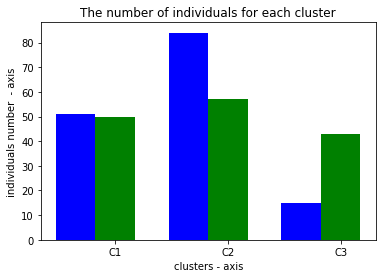

In [444]:
# x-coordinates of left sides of bars 
left = np.arange(3)
  
# heights of bars
height = nbrElem
height1 = kmeansNbrElem
width = 0.35
# labels for bars
tick_label = ['C1', 'C2', 'C3']
# plotting a bar chart
plt.bar(left, height, tick_label = tick_label, width = 0.35, color = ['blue'], label='kmeans')
plt.bar(left+width, height1, tick_label = tick_label, width = 0.35, color = ['green'])
  
# naming the x-axis
plt.xlabel('clusters - axis')
# naming the y-axis
plt.ylabel('individuals number  - axis')
# plot title
plt.title('The number of individuals for each cluster')
  
# function to show the plot
plt.show()
#--------------------------------

##Comparaison between interdistances of clustering and kmeans algorithm

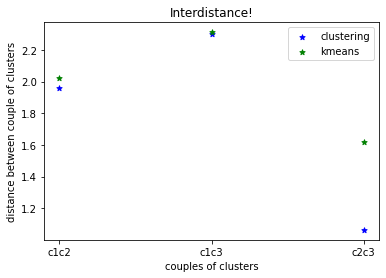

In [445]:
# x-axis values
x = ['c1c2','c1c3','c2c3']
# y-axis values
y1 = distanceEntreCluster
y2 = distanceEntreClusterKMeans
# plotting points as a scatter plot
plt.scatter(x, y1, label= "clustering", color= "blue", 
            marker= "*", s=30)
plt.scatter(x, y2, label= "kmeans", color= "green", 
            marker= "*", s=30) 
# x-axis label
plt.xlabel('couples of clusters')
# frequency label
plt.ylabel('distance between couple of clusters')
# plot title
plt.title('Interdistance!')
# showing legend
plt.legend()
  
# function to show the plot
plt.show()